In [1]:
#importing the libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
#size of input images
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Research_Dataset/Train_Dataset'
test_path = '/content/drive/MyDrive/Research_Dataset/Test_Dataset'

#adding pre-processing layer to the front of vgg 16
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

#don't train the existing weights
for layer in vgg.layers:
    layer.trainable = False

#for getting the number of classes
folders = glob('/content/drive/MyDrive/Research_Dataset/Train_Dataset/*')

#we can add as per our need
x1 = Flatten()(vgg.output)
x2 = Dense(units = 256, activation = 'relu')(x1)
x3 = Dense(units = 256, activation = 'relu')(x2)
prediction = Dense(len(folders), activation = 'softmax')(x3)

#creating a model object
model = Model(inputs = vgg.input, outputs=prediction)

In [40]:
#getting the overview of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [41]:
#tell the model what cost and optimization to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research_Dataset/Train_Dataset',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research_Dataset/Test_Dataset',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



Found 78 images belonging to 12 classes.
Found 22 images belonging to 12 classes.


In [43]:
#fit the model
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-43-761a91be0ccc>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
3/3 [==============================] - 66s 22s/step - loss: 4.3860 - accuracy: 0.0513 - val_loss: 4.7213 - val_accuracy: 0.0909
Epoch 2/5
3/3 [==============================] - 64s 21s/step - loss: 4.0833 - accuracy: 0.1154 - val_loss: 2.8724 - val_accuracy: 0.0909
Epoch 3/5
3/3 [==============================] - 72s 31s/step - loss: 2.8534 - accuracy: 0.1410 - val_loss: 2.5001 - val_accuracy: 0.3182
Epoch 4/5
3/3 [==============================] - 70s 24s/step - loss: 2.3462 - accuracy: 0.3205 - val_loss: 1.9124 - val_accuracy: 0.3636
Epoch 5/5
3/3 [==============================] - 70s 31s/step - loss: 1.8284 - accuracy: 0.3718 - val_loss: 1.8553 - val_accuracy: 0.3636


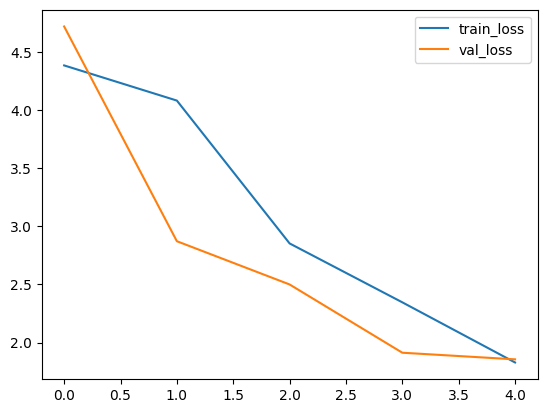

<Figure size 640x480 with 0 Axes>

In [44]:
#loss plot
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

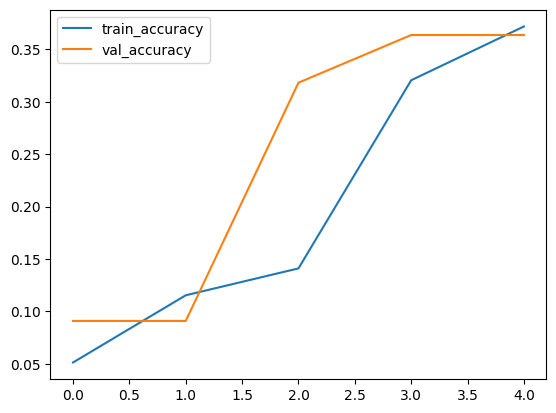

<Figure size 640x480 with 0 Axes>

In [45]:
#accuracy plot
plt.plot(r.history['accuracy'], label = 'train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
#save the model
import tensorflow as tf
from keras.models import load_model

model.save('facefeatures_new_model.h5')

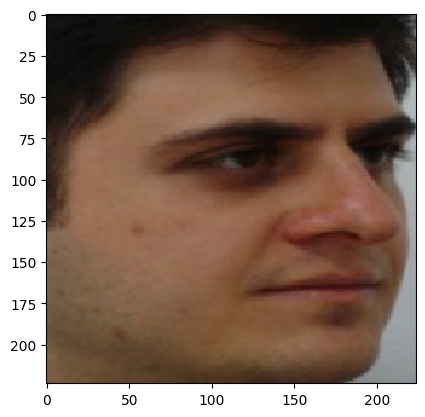

In [48]:
import keras.utils as image

img = image.load_img("/content/drive/MyDrive/Research_Dataset/Test_Dataset/1/1-08.jpg",target_size = (224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [49]:
from keras.models import load_model

saved_model = load_model('facefeatures_new_model.h5')
output = saved_model.predict(img)
print(output.shape)
print(output)


1/1 [==============================] - 1s 725ms/step
(1, 12)
[[3.2418222e-06 1.4173674e-19 5.2709353e-14 5.9473286e-12 3.4998493e-20
  2.7653352e-10 9.9722552e-01 2.5551926e-05 7.7799711e-11 2.4316845e-05
  1.2305912e-09 2.7213974e-03]]
